In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [150]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [151]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [152]:
data.shape

(614, 13)

In [153]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [154]:
data=data.dropna()

In [155]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [156]:
data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [157]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [158]:
data.replace({'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0}},inplace=True)

In [159]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [160]:
data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [161]:
data=data.replace(to_replace='3+',value=3)

In [162]:
data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

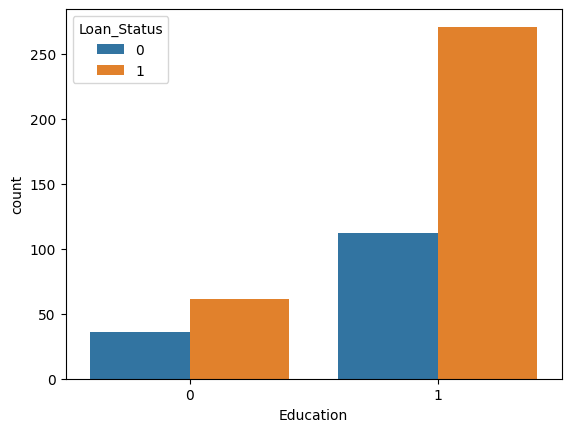

In [163]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='LoanAmount', ylabel='count'>

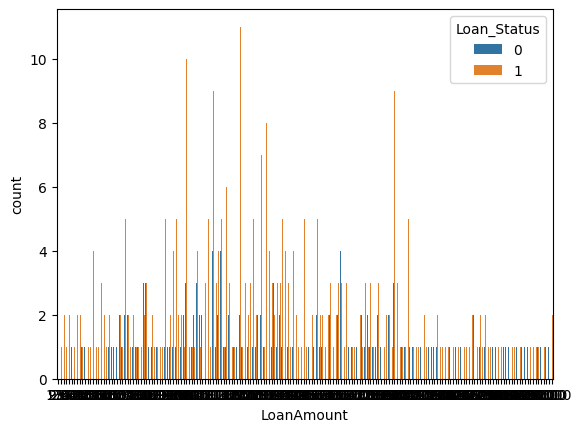

In [164]:
sns.countplot(x='LoanAmount',hue='Loan_Status',data=data)

In [165]:
import matplotlib.pyplot as plt

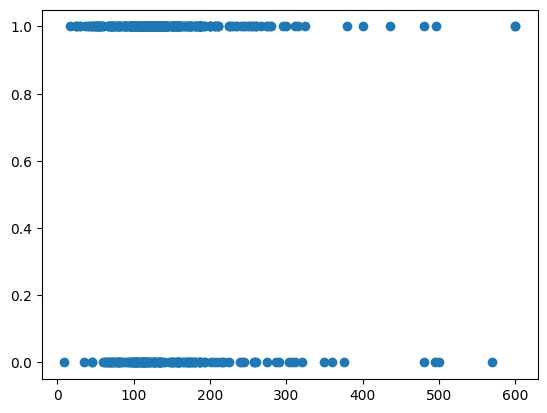

In [166]:
plt.scatter(data['LoanAmount'],data['Loan_Status'])
plt.show()

In [167]:
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [168]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [170]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


In [171]:
classifier=svm.SVC(kernel='linear')

In [172]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [173]:
x_train_predict=classifier.predict(x_train)
x_test_predict=classifier.predict(x_test)

In [174]:
x_train_acc=accuracy_score(x_train_predict,y_train)
x_test_acc=accuracy_score(x_test_predict,y_test)

In [175]:
print(x_train_acc)
print(x_test_acc)

0.7864583333333334
0.6666666666666666


In [181]:
import numpy as np

# Input data
input_data = ('Female','No',0,'Not Graduate','No',4230,0,112,360,1,'Rural')

# Convert the input data to a numpy array
input_arr = np.asarray(input_data)

# Define the mapping dictionary
mapping = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'No': 0, 'Yes': 1},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0}
}

# Function to map the categorical values
def map_values(value, category):
    if category in mapping:
        return mapping[category].get(value, value)
    return value

# Map the categorical values in the input array
mapped_input = [
    map_values(value, category) for value, category in zip(input_data,
        ['Gender', 'Married', None, 'Education', 'Self_Employed', None, None, None, None, None, 'Property_Area'])
]

# Convert the mapped input to a numpy array and reshape it
input_res = np.asarray(mapped_input).reshape(1, -1)

print(input_res)



[[   0    0    0    0    0 4230    0  112  360    1    0]]


In [182]:
prediction=classifier.predict(input_res)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
